<a href="https://colab.research.google.com/github/elvispletsch/-Avaliacao-de-Propostas-de-Fornecedores/blob/main/Avalia%C3%A7%C3%A3o_de_Propostas_de_Fornecedores.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Com base em um orçamento de 9 empresas diferentes, vamos tentar encontrar:
- qual fornecedor está fazendo o melhor preço.
- qual é o preço "ótimo" para cada item.
- quais são os itens que possuem maior representatividade no orçamento
- qual fornecedor fez o menor valor em uma quantidade maior de itens
- listar qual fornecedor devemos escolher para cada item

**Importando as bibliotecas e arquivos da análise.**

In [ ]:
import pandas as pd
import os

arquivos = os.listdir() #Com essa função, ele irá buscar todos os arquivos que estão na pasta. São 9 arquivos que representam 9 fornecedores.
print(arquivos)

['.config', 'Empresa C.xlsx', 'Empresa H.xlsx', 'Empresa D.xlsx', 'Empresa F.xlsx', 'Empresa E.xlsx', 'Empresa B.xlsx', 'Empresa A.xlsx', 'Empresa G.xlsx', 'sample_data']


In [ ]:
licitacao = pd.read_excel('Empresa C.xlsx')
display(licitacao)

,Item,Descrição do Item,Quantidade,Valor Unitário,Total
0,1,Item 1,50,29,1450
1,2,Item 2,96,26,2496
2,3,Item 3,58,22,1276
3,4,Item 4,69,50,3450
4,5,Item 5,61,28,1708
...,...,...,...,...,...
195,196,Item 196,60,17,1020
196,197,Item 197,82,38,3116
197,198,Item 198,100,11,1100
198,199,Item 199,67,40,2680


In [ ]:
#Precisamos fazer uma junção de todas as planilhas para analisar. Para isso, vamos alterar o nome da coluna "Total" pelo nome da Empresa e remover a coluna Valor Unitário

licitacao = licitacao.rename(columns={'Total' : 'Empresa C'})
licitacao = licitacao.drop(['Valor Unitário'], axis=1)
display(licitacao)

#Agora, vamos replicar isso para todas as bases e fazer a junção.

empresas = arquivos[1:9]
for empresa in empresas:
  proposta = pd.read_excel(empresa)
  licitacao[empresa[:-5]] = proposta['Total'].copy()
display(licitacao)

,Item,Descrição do Item,Quantidade,Empresa C
0,1,Item 1,50,1450
1,2,Item 2,96,2496
2,3,Item 3,58,1276
3,4,Item 4,69,3450
4,5,Item 5,61,1708
...,...,...,...,...
195,196,Item 196,60,1020
196,197,Item 197,82,3116
197,198,Item 198,100,1100
198,199,Item 199,67,2680


,Item,Descrição do Item,Quantidade,Empresa C,Empresa H,Empresa D,Empresa F,Empresa E,Empresa B,Empresa A,Empresa G
0,1,Item 1,50,1450,2450,2100,1000,2050,1250,2350,650
1,2,Item 2,96,2496,1056,2208,2592,1248,1632,2688,1440
2,3,Item 3,58,1276,1508,1914,2146,1508,754,1566,2378
3,4,Item 4,69,3450,3105,759,2208,1932,828,1863,1725
4,5,Item 5,61,1708,610,1769,1830,2684,1281,1342,2318
...,...,...,...,...,...,...,...,...,...,...,...
195,196,Item 196,60,1020,2580,2400,2100,1620,1440,1440,2160
196,197,Item 197,82,3116,1804,1886,3608,1394,1066,2050,3608
197,198,Item 198,100,1100,1100,1000,4900,3300,2000,3400,1100
198,199,Item 199,67,2680,3015,1809,2881,2814,1072,804,670


**Verificando os valores totais dos fornecedores**

In [ ]:
# Qual foi a proposta total de cada um dos fornecedores?

for coluna in licitacao.columns[3:]:
  total = licitacao[coluna].sum()
  print('A proposta total de', coluna, 'é R$', total)



A proposta total de Empresa C é R$ 447536
A proposta total de Empresa H é R$ 459468
A proposta total de Empresa D é R$ 421243
A proposta total de Empresa F é R$ 472515
A proposta total de Empresa E é R$ 446904
A proposta total de Empresa B é R$ 267971
A proposta total de Empresa A é R$ 429316
A proposta total de Empresa G é R$ 428703


**Definindo o resultado "ótimo"**

In [ ]:
#Vamos criar uma coluna de mínimo, que mostrará o menor valor entre todas as empresas.
licitacao['Mínimo'] = licitacao.drop(['Item', 'Descrição do Item', 'Quantidade'], axis=1).min(axis=1)
display(licitacao)

#Agora vamos somar o valor da coluna para ver qual seria o melhor valor (o menor possível)
melhor_valor = licitacao['Mínimo'].sum()
print('O melhor valor é R$', melhor_valor)


,Item,Descrição do Item,Quantidade,Empresa C,Empresa H,Empresa D,Empresa F,Empresa E,Empresa B,Empresa A,Empresa G,Mínimo
0,1,Item 1,50,1450,2450,2100,1000,2050,1250,2350,650,650
1,2,Item 2,96,2496,1056,2208,2592,1248,1632,2688,1440,1056
2,3,Item 3,58,1276,1508,1914,2146,1508,754,1566,2378,754
3,4,Item 4,69,3450,3105,759,2208,1932,828,1863,1725,759
4,5,Item 5,61,1708,610,1769,1830,2684,1281,1342,2318,610
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,Item 196,60,1020,2580,2400,2100,1620,1440,1440,2160,1020
196,197,Item 197,82,3116,1804,1886,3608,1394,1066,2050,3608,1066
197,198,Item 198,100,1100,1100,1000,4900,3300,2000,3400,1100,1000
198,199,Item 199,67,2680,3015,1809,2881,2814,1072,804,670,670


O melhor valor é R$ 193299


**Criando uma planilha de desvios por fornecedor**

In [ ]:
# Vamos verificar a diferença entre o nosso melhor valor e os valores orçados por fornecedor.
desvios = []
for empresa in licitacao.columns[3:-1]:
    desvio = licitacao[['Item', 'Descrição do Item', 'Quantidade', empresa, 'Mínimo']].copy()
    desvio['Delta'] = desvio[empresa] - desvio['Mínimo']
    desvios.append(desvio)
    display(desvio)

,Item,Descrição do Item,Quantidade,Empresa C,Mínimo,Delta
0,1,Item 1,50,1450,650,800
1,2,Item 2,96,2496,1056,1440
2,3,Item 3,58,1276,754,522
3,4,Item 4,69,3450,759,2691
4,5,Item 5,61,1708,610,1098
...,...,...,...,...,...,...
195,196,Item 196,60,1020,1020,0
196,197,Item 197,82,3116,1066,2050
197,198,Item 198,100,1100,1000,100
198,199,Item 199,67,2680,670,2010


,Item,Descrição do Item,Quantidade,Empresa H,Mínimo,Delta
0,1,Item 1,50,2450,650,1800
1,2,Item 2,96,1056,1056,0
2,3,Item 3,58,1508,754,754
3,4,Item 4,69,3105,759,2346
4,5,Item 5,61,610,610,0
...,...,...,...,...,...,...
195,196,Item 196,60,2580,1020,1560
196,197,Item 197,82,1804,1066,738
197,198,Item 198,100,1100,1000,100
198,199,Item 199,67,3015,670,2345


,Item,Descrição do Item,Quantidade,Empresa D,Mínimo,Delta
0,1,Item 1,50,2100,650,1450
1,2,Item 2,96,2208,1056,1152
2,3,Item 3,58,1914,754,1160
3,4,Item 4,69,759,759,0
4,5,Item 5,61,1769,610,1159
...,...,...,...,...,...,...
195,196,Item 196,60,2400,1020,1380
196,197,Item 197,82,1886,1066,820
197,198,Item 198,100,1000,1000,0
198,199,Item 199,67,1809,670,1139


,Item,Descrição do Item,Quantidade,Empresa F,Mínimo,Delta
0,1,Item 1,50,1000,650,350
1,2,Item 2,96,2592,1056,1536
2,3,Item 3,58,2146,754,1392
3,4,Item 4,69,2208,759,1449
4,5,Item 5,61,1830,610,1220
...,...,...,...,...,...,...
195,196,Item 196,60,2100,1020,1080
196,197,Item 197,82,3608,1066,2542
197,198,Item 198,100,4900,1000,3900
198,199,Item 199,67,2881,670,2211


,Item,Descrição do Item,Quantidade,Empresa E,Mínimo,Delta
0,1,Item 1,50,2050,650,1400
1,2,Item 2,96,1248,1056,192
2,3,Item 3,58,1508,754,754
3,4,Item 4,69,1932,759,1173
4,5,Item 5,61,2684,610,2074
...,...,...,...,...,...,...
195,196,Item 196,60,1620,1020,600
196,197,Item 197,82,1394,1066,328
197,198,Item 198,100,3300,1000,2300
198,199,Item 199,67,2814,670,2144


,Item,Descrição do Item,Quantidade,Empresa B,Mínimo,Delta
0,1,Item 1,50,1250,650,600
1,2,Item 2,96,1632,1056,576
2,3,Item 3,58,754,754,0
3,4,Item 4,69,828,759,69
4,5,Item 5,61,1281,610,671
...,...,...,...,...,...,...
195,196,Item 196,60,1440,1020,420
196,197,Item 197,82,1066,1066,0
197,198,Item 198,100,2000,1000,1000
198,199,Item 199,67,1072,670,402


,Item,Descrição do Item,Quantidade,Empresa A,Mínimo,Delta
0,1,Item 1,50,2350,650,1700
1,2,Item 2,96,2688,1056,1632
2,3,Item 3,58,1566,754,812
3,4,Item 4,69,1863,759,1104
4,5,Item 5,61,1342,610,732
...,...,...,...,...,...,...
195,196,Item 196,60,1440,1020,420
196,197,Item 197,82,2050,1066,984
197,198,Item 198,100,3400,1000,2400
198,199,Item 199,67,804,670,134


,Item,Descrição do Item,Quantidade,Empresa G,Mínimo,Delta
0,1,Item 1,50,650,650,0
1,2,Item 2,96,1440,1056,384
2,3,Item 3,58,2378,754,1624
3,4,Item 4,69,1725,759,966
4,5,Item 5,61,2318,610,1708
...,...,...,...,...,...,...
195,196,Item 196,60,2160,1020,1140
196,197,Item 197,82,3608,1066,2542
197,198,Item 198,100,1100,1000,100
198,199,Item 199,67,670,670,0


**Procurando os itens que possuem maior delta e maior valor, para afunilar a análise**

In [ ]:
# Primeiro, precisamos concatenar todos os desvios em um único DataFrame
desvios_df = pd.concat(desvios)

# Agora, vamos calcular a média do Delta por item e renomear a coluna para "delta_médio" para ficar mais claro.
delta_por_item = desvios_df.groupby(['Item', 'Descrição do Item'])['Delta'].mean().reset_index()
delta_por_item = delta_por_item.rename(columns={'Delta': 'Delta_médio'})
display(delta_por_item)

,Item,Descrição do Item,Delta_médio
0,1,Item 1,1012.500
1,2,Item 2,864.000
2,3,Item 3,877.250
3,4,Item 4,1224.750
4,5,Item 5,1082.750
...,...,...,...
195,196,Item 196,825.000
196,197,Item 197,1250.500
197,198,Item 198,1237.500
198,199,Item 199,1298.125


In [ ]:
# Vamos calcular o total gasto por item somando todas as colunas de empresas
licitacao['Total'] = licitacao.iloc[:, 3:-2].sum(axis=1)

# agrupar por 'Item' e 'Descrição do Item' e somar os valores totais
total_por_item = licitacao.groupby(['Item', 'Descrição do Item'])['Total'].sum().reset_index()
display(total_por_item)

# Juntar os resultados de 'total_por_item' e 'delta_por_item' e ordenar os itens pelo maior Delta médio e Total gasto
resultados = pd.merge(total_por_item, delta_por_item, on=['Item', 'Descrição do Item'])
itens_foco = resultados.sort_values(by=['Delta_médio', 'Total'], ascending=False).head(10)
display(itens_foco)


,Item,Descrição do Item,Total
0,1,Item 1,13300
1,2,Item 2,15360
2,3,Item 3,13050
3,4,Item 4,15870
4,5,Item 5,13542
...,...,...,...
195,196,Item 196,14760
196,197,Item 197,18532
197,198,Item 198,17900
198,199,Item 199,15745


,Item,Descrição do Item,Total,Delta_médio
111,112,Item 112,24638,2109.750
14,15,Item 15,26829,2066.625
50,51,Item 51,22704,1958.000
26,27,Item 27,22420,1890.500
102,103,Item 103,24960,1872.000
30,31,Item 31,21303,1852.875
184,185,Item 185,26038,1844.750
35,36,Item 36,24794,1825.250
52,53,Item 53,24849,1819.125
48,49,Item 49,21600,1740.000


**Vizualizando os dados em gráfico**

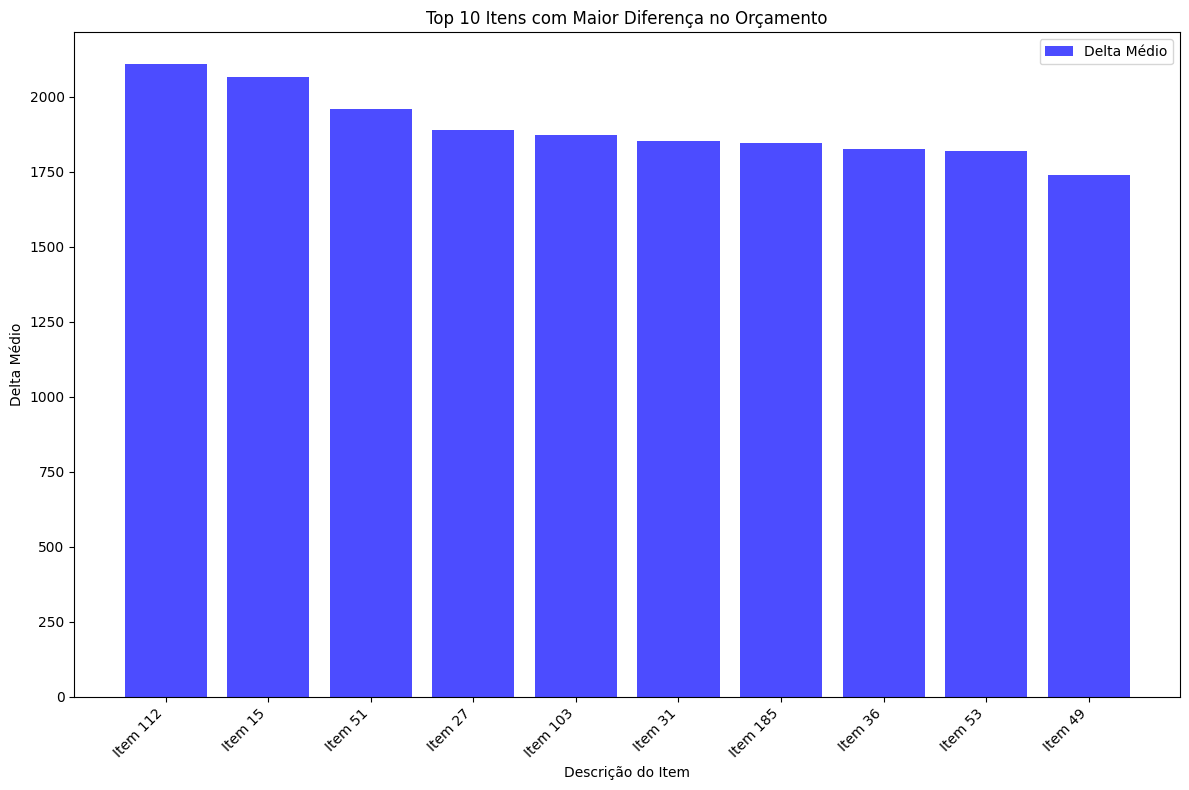

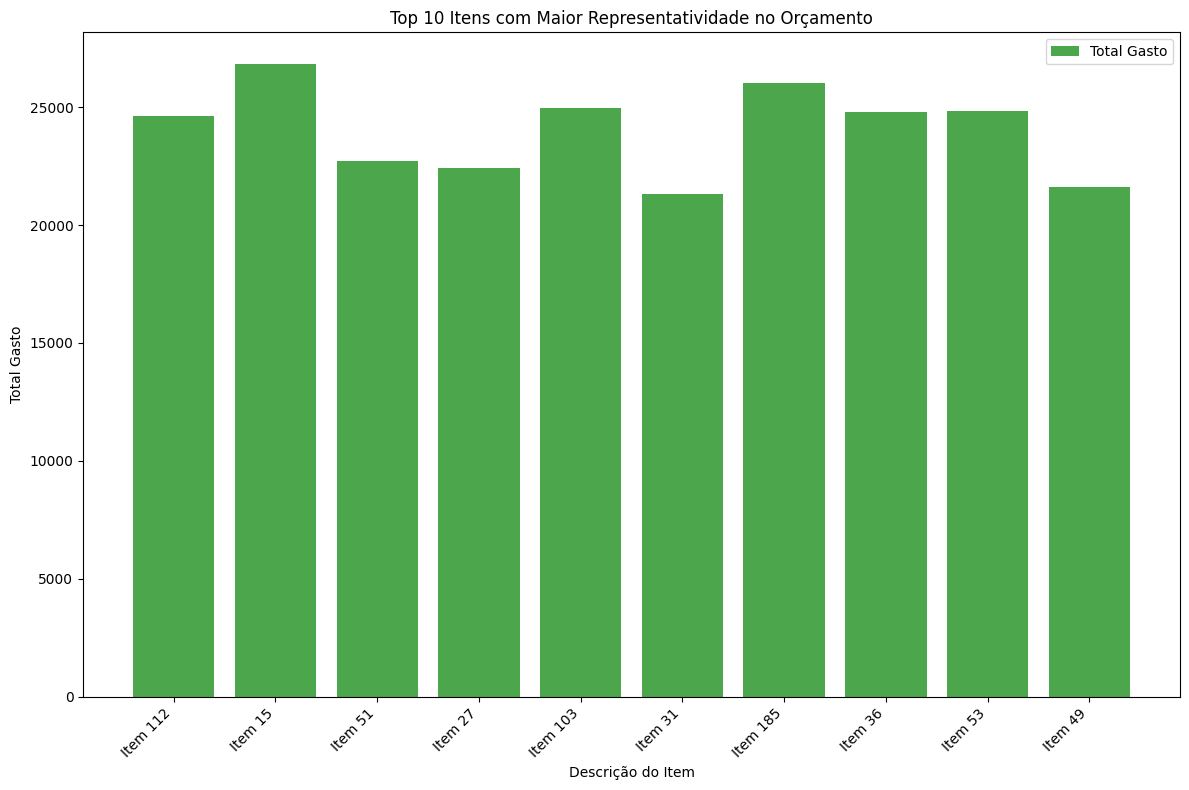

In [ ]:
import matplotlib.pyplot as plt

# Gráfico de barras para Delta_médio
plt.figure(figsize=(12, 8))
plt.bar(itens_foco['Descrição do Item'], itens_foco['Delta_médio'], color='blue', alpha=0.7, label='Delta Médio')
plt.xlabel('Descrição do Item')
plt.ylabel('Delta Médio')
plt.title('Top 10 Itens com Maior Diferença no Orçamento')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

# Gráfico de barras para Total gasto
plt.figure(figsize=(12, 8))
plt.bar(itens_foco['Descrição do Item'], itens_foco['Total'], color='green', alpha=0.7, label='Total Gasto')
plt.xlabel('Descrição do Item')
plt.ylabel('Total Gasto')
plt.title('Top 10 Itens com Maior Representatividade no Orçamento')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()


**Demonstrando graficamente qual é o fornecedor que oferece o maior número de itens com menor preço**

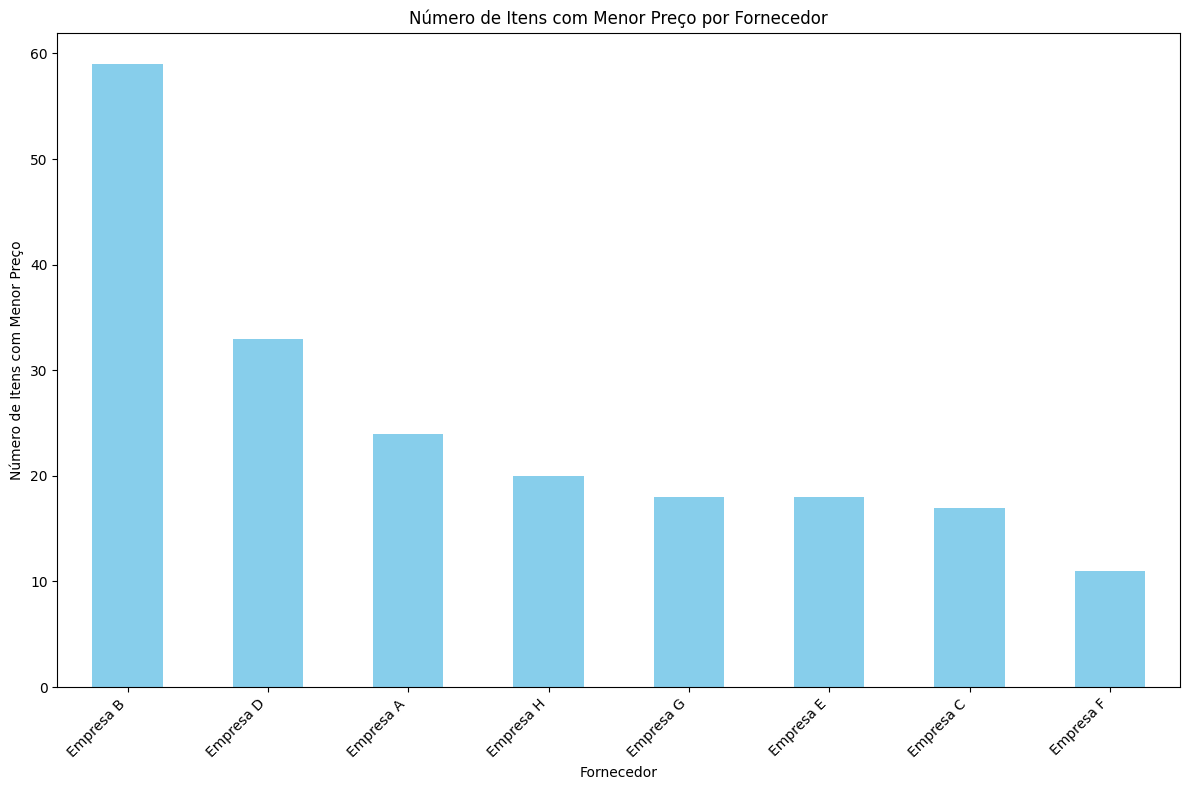

In [ ]:
# Identificar o fornecedor com o menor valor para cada item
licitacao['Fornecedor Mais Barato'] = licitacao.drop(['Item', 'Descrição do Item', 'Quantidade', 'Mínimo'], axis=1).idxmin(axis=1)

# Plotar o gráfico dos fornecedores mais baratos
fornecedor_counts = licitacao['Fornecedor Mais Barato'].value_counts()
plt.figure(figsize=(12, 8))
fornecedor_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Fornecedor')
plt.ylabel('Número de Itens com Menor Preço')
plt.title('Número de Itens com Menor Preço por Fornecedor')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Listar com qual empresa comprar cada item
melhor_compra = licitacao[['Item', 'Descrição do Item', 'Fornecedor Mais Barato', 'Mínimo']]
melhor_compra = melhor_compra.sort_values(by='Fornecedor Mais Barato')

# Exibir a lista detalhada
print("Lista de compras detalhada:")
print(melhor_compra)

Lista de compras detalhada:
     Item Descrição do Item Fornecedor Mais Barato  Mínimo
88     89           Item 89              Empresa A    1140
176   177          Item 177              Empresa A     540
34     35           Item 35              Empresa A    1248
33     34           Item 34              Empresa A    1008
115   116          Item 116              Empresa A     845
..    ...               ...                    ...     ...
130   131          Item 131              Empresa H    1131
145   146          Item 146              Empresa H     590
152   153          Item 153              Empresa H    1365
65     66           Item 66              Empresa H     902
199   200          Item 200              Empresa H     767

[200 rows x 4 columns]
